In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import pyreadstat as st
import numpy as np
import matplotlib.pyplot as plt


path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\DiTella\MEC\Materias\2025\2025 1T\[MT09] Econometría de Datos de Panel\Clases prácticas\PS 0-20250420\ps0_data\mus03data.dta"

df, meta = st.read_dta(path)
df.head()

,dupersid,year03,age,famsze,educyr,totexp,private,retire,female,white,hisp,marry,northe,mwest,south,phylim,actlim,msa,income,injury,priolist,totchr,omc,hmo,mnc,ratio,posexp,suppins,hvgg,hfp,ltotexp,hins,hdem
0,93193020.0,1.0,69.0,2.0,14.0,3.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,12.804,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.098612,1.0,NaN
1,72072017.0,1.0,65.0,1.0,11.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,34.959,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.791759,NaN,1.0
2,25296013.0,1.0,85.0,1.0,14.0,9.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,12.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.197225,NaN,1.0
3,23628011.0,1.0,76.0,5.0,10.0,14.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,7.000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.639057,1.0,1.0
4,95041014.0,1.0,71.0,1.0,14.0,18.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.308,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.890372,1.0,1.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3064 entries, 0 to 3063
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   dupersid  3064 non-null   float64
 1   year03    3064 non-null   float64
 2   age       3064 non-null   float64
 3   famsze    3064 non-null   float64
 4   educyr    3064 non-null   float64
 5   totexp    3064 non-null   float64
 6   private   3064 non-null   float64
 7   retire    3064 non-null   float64
 8   female    3064 non-null   float64
 9   white     3064 non-null   float64
 10  hisp      3064 non-null   float64
 11  marry     3064 non-null   float64
 12  northe    3064 non-null   float64
 13  mwest     3064 non-null   float64
 14  south     3064 non-null   float64
 15  phylim    3064 non-null   float64
 16  actlim    3064 non-null   float64
 17  msa       3064 non-null   float64
 18  income    3064 non-null   float64
 19  injury    3064 non-null   float64
 20  priolist  3064 non-null   floa

In [3]:
df[['ltotexp', 'suppins', 'phylim', 'actlim', 'totchr', 'age', 'female', 'income']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3064 entries, 0 to 3063
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ltotexp  2955 non-null   float64
 1   suppins  3064 non-null   float64
 2   phylim   3064 non-null   float64
 3   actlim   3064 non-null   float64
 4   totchr   3064 non-null   float64
 5   age      3064 non-null   float64
 6   female   3064 non-null   float64
 7   income   3064 non-null   float64
dtypes: float64(8)
memory usage: 191.6 KB


In [4]:
df.dropna(subset=['ltotexp'], inplace=True)

In [5]:
import statsmodels.api as sm

y = df['ltotexp']
x = df[['suppins', 'phylim', 'actlim', 'totchr', 'age', 'female', 'income']]
X = sm.add_constant(x)

model = sm.OLS(y,X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ltotexp   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     125.0
Date:                Tue, 06 May 2025   Prob (F-statistic):          2.81e-161
Time:                        23:16:06   Log-Likelihood:                -4733.4
No. Observations:                2955   AIC:                             9483.
Df Residuals:                    2947   BIC:                             9531.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7037      0.277     24.222      0.000       6.161       7.246
suppins        0.2556      0.046      5.530      0.000       0.165       0.346
phylim         0.3021      0.057      5.302      0.000       0.190       0.414
actlim         0.3560      0.062      5.732      0.000       0.234       0.478
totchr         0.3758      0.018     20.400      0.000       0.340       0.412
age            0.0038      0.004      1.040      0.299      -0.003       0.011
female        -0.0843      0.046     -1.852      0.064      -0.174       0.005
income         0.0025      0.001      2.501      0.012       0.001       0.005
==============================================================================
Omnibus:                       85.373   Durbin-Watson:                   0.451
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.377
Skew:                          -0.253   Prob(JB):                     1.21e-31
Kurtosis:                       3.949   Cond. No.                         979.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# ——— Tests ———

# A) Test univariante: totchr = 0 (equivale a `test totchr=0`)
t_test_totchr = results.t_test('totchr = 0')
print("\nTest totchr = 0:")
print(t_test_totchr)

# B) Test múltiple conjunto (equivale a `test (suppins=0) (phylim=0) …`)
hypotheses = 'suppins = 0, phylim = 0, actlim = 0, totchr = 0, age = 0, female = 0, income = 0'
f_test_all = results.f_test(hypotheses)
print("\nTest conjunto de todas las variables = 0:")
print(f_test_all)



Test totchr = 0:
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.3758      0.018     20.400      0.000       0.340       0.412

Test conjunto de todas las variables = 0:
<F test: F=124.98277649611691, p=2.8102416001644407e-161, df_denom=2.95e+03, df_num=7>


In [22]:
import pandas as pd
pd.set_option('display.max_columns', None)
import pyreadstat as st
import numpy as np
import matplotlib.pyplot as plt


path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\DiTella\MEC\Materias\2025\2025 1T\[MT09] Econometría de Datos de Panel\Clases prácticas\PS 0-20250420\ps0_data\mus08psidextract.dta"

df, meta = st.read_dta(path)
df.head()

,exp,wks,occ,ind,south,smsa,ms,fem,union,ed,blk,lwage,id,t,tdum1,tdum2,tdum3,tdum4,tdum5,tdum6,tdum7,exp2
0,3.0,32.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9.0,0.0,5.56068,1.0,1.0,1,0,0,0,0,0,0,9.0
1,4.0,43.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9.0,0.0,5.72031,1.0,2.0,0,1,0,0,0,0,0,16.0
2,5.0,40.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9.0,0.0,5.99645,1.0,3.0,0,0,1,0,0,0,0,25.0
3,6.0,39.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9.0,0.0,5.99645,1.0,4.0,0,0,0,1,0,0,0,36.0
4,7.0,42.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,9.0,0.0,6.06146,1.0,5.0,0,0,0,0,1,0,0,49.0


In [8]:
# 2. Equivale a `xtset id t`
df = df.set_index(['id', 't']).sort_index()

# 3. “xtdescribe” manual:
#   - Número de paneles
n_panels     = df.index.get_level_values('id').nunique()
#   - Número total de observaciones
n_obs        = len(df)
#   - Número de periodos distintos (global)
n_periods    = df.index.get_level_values('t').nunique()
#   - Periodos por panel  
periods_per  = df.groupby(level='id').size()
min_p        = periods_per.min()
max_p        = periods_per.max()
#   - ¿Balanced?
is_balanced  = (min_p == max_p)

print(f"Panel identifier:            id")
print(f"Time variable:              t")
print(f"Número de paneles:          {n_panels}")
print(f"Total de observaciones:     {n_obs}")
print(f"Periodos distintos (global): {n_periods}")
print(f"Períodos por panel:         min={min_p}, max={max_p}")
print(f"¿Balanced panel?            {'Sí' if is_balanced else 'No'}")

Panel identifier:            id
Time variable:              t
Número de paneles:          595
Total de observaciones:     4165
Periodos distintos (global): 7
Períodos por panel:         min=7, max=7
¿Balanced panel?            Sí


In [17]:
import pandas as pd
from linearmodels.panel.data import PanelData

# Datos de ejemplo
# Equivalente a xtset id t
df = df.set_index(['id', 't']).sort_index()

# Crea el objeto PanelData
pdata = PanelData(df)

# Información “estilo xtdescribe”
n_entities = len(pdata.entity_ids)
n_time     = len(pdata.time_ids)
n_obs      = pdata.dataframe.shape[0]

# Cálculo manual de “balanced”
counts_per_entity = pdata.dataframe.groupby(level='id').size()
min_p, max_p      = counts_per_entity.min(), counts_per_entity.max()
is_balanced       = (min_p == max_p)

print(f"Panel identifier:      id")
print(f"Time variable:         t")
print(f"Entidades (paneles):   {n_entities}")
print(f"Time points:           {n_time}")
print(f"Total observaciones:   {n_obs}")
print(f"Períodos por panel:    min={min_p}, max={max_p}")
print(f"Balanced panel?        {'Sí' if is_balanced else 'No'}")


Panel identifier:      id
Time variable:         t
Entidades (paneles):   4165
Time points:           4165
Total observaciones:   4165
Períodos por panel:    min=7, max=7
Balanced panel?        Sí


In [18]:
pdata

PanelData
           exp   wks  occ  ind  south  smsa   ms  fem  union    ed  blk  \
id    t                                                                   
1.0   1.0  3.0  32.0  0.0  0.0    1.0   0.0  1.0  0.0    0.0   9.0  0.0   
      2.0  4.0  43.0  0.0  0.0    1.0   0.0  1.0  0.0    0.0   9.0  0.0   
      3.0  5.0  40.0  0.0  0.0    1.0   0.0  1.0  0.0    0.0   9.0  0.0   
      4.0  6.0  39.0  0.0  0.0    1.0   0.0  1.0  0.0    0.0   9.0  0.0   
      5.0  7.0  42.0  0.0  1.0    1.0   0.0  1.0  0.0    0.0   9.0  0.0   
...        ...   ...  ...  ...    ...   ...  ...  ...    ...   ...  ...   
595.0 3.0  3.0  50.0  0.0  0.0    0.0   1.0  0.0  1.0    0.0  12.0  0.0   
      4.0  4.0  49.0  0.0  0.0    0.0   1.0  0.0  1.0    0.0  12.0  0.0   
      5.0  5.0  50.0  0.0  0.0    0.0   1.0  0.0  1.0    0.0  12.0  0.0   
      6.0  6.0  50.0  0.0  0.0    0.0   1.0  0.0  1.0    0.0  12.0  0.0   
      7.0  7.0  50.0  0.0  0.0    0.0   1.0  0.0  1.0    0.0  12.0  0.0   

             lwage  tdum1  tdum2  tdum3  tdum4  tdum5  tdum6  tdum7  exp2  
id    t                                                                    
1.0   1.0  5.56068    1.0    0.0    0.0    0.0    0.0    0.0    0.0   9.0  
      2.0  5.72031    0.0    1.0    0.0    0.0    0.0    0.0    0.0  16.0  
      3.0  5.99645    0.0    0.0    1.0    0.0    0.0    0.0    0.0  25.0  
      4.0  5.99645    0.0    0.0    0.0    1.0    0.0    0.0    0.0  36.0  
      5.0  6.06146    0.0    0.0    0.0    0.0    1.0    0.0    0.0  49.0  
...            ...    ...    ...    ...    ...    ...    ...    ...   ...  
595.0 3.0  5.95324    0.0    0.0    1.0    0.0    0.0    0.0    0.0   9.0  
      4.0  6.06379    0.0    0.0    0.0    1.0    0.0    0.0    0.0  16.0  
      5.0  6.21461    0.0    0.0    0.0    0.0    1.0    0.0    0.0  25.0  
      6.0  6.29157    0.0    0.0    0.0    0.0    0.0    1.0    0.0  36.0  
      7.0  6.37161    0.0    0.0    0.0    0.0    0.0    0.0    1.0  49.0  

[4165 rows x 20 columns]
PanelData object, id: 0x1e7834e37d0

In [20]:
def xtsum(df, panel_col, time_col, vars_list):
    # Aseguramos el multi‐índice tipo xtset id t
    df = df.set_index([panel_col, time_col]).sort_index()
    
    summary = []
    for var in vars_list:
        ser = df[var].dropna()
        
        # 1. N
        nobs = ser.count()
        
        # 2. Media total
        mean_all = ser.mean()
        
        # 3. Desviación estándar total
        sd_all = ser.std(ddof=1)
        
        # 4. Between: desviación de las medias por panel
        panel_means = ser.groupby(level=panel_col).mean()
        sd_between = panel_means.std(ddof=1)
        
        # 5. Within: desviación de (obs – media_panel)
        within_dev = ser - ser.groupby(level=panel_col).transform('mean')
        sd_within = within_dev.std(ddof=1)
        
        summary.append({
            'variable':       var,
            'N':              nobs,
            'Mean':           mean_all,
            'Std.Dev.':       sd_all,
            'Between SD':     sd_between,
            'Within SD':      sd_within
        })
    
    return pd.DataFrame(summary).set_index('variable')

# Ejemplo de uso:
# df debe contener al menos las columnas 'id', 't', 'lwage', 'ed', 'exp', 'exp2', 'wks'
# df = pd.read_csv("tus_datos.csv")  # carga tus datos
res = xtsum(df, panel_col='id', time_col='t', 
            vars_list=['lwage','ed','exp','exp2','wks'])

print(res)

             N        Mean    Std.Dev.  Between SD  Within SD
variable                                                     
lwage     4165    6.676346    0.461512    0.394239   0.240402
ed        4165   12.845378    2.787995    2.790006   0.000000
exp       4165   19.853782   10.966370   10.790184   2.000240
exp2      4165  514.405042  496.996221  489.049510  90.445811
wks       4165   46.811525    5.129098    3.284016   3.941881


In [21]:
# Falta abrir entre overall, between y within.

In [23]:

def xttrans(df, panel_col, time_col, var, prob=False):
    """
    Calcula la matriz de transición para la variable categórica `var`
    dentro de cada panel definido por `panel_col` y ordenado por `time_col`.

    Parámetros
    ----------
    df : pandas.DataFrame
    panel_col : str
        Nombre de la columna de identificador de panel (p.ej. 'id').
    time_col : str
        Nombre de la columna de tiempo (p.ej. 't').
    var : str
        Nombre de la variable categórica para la que se quieren las transiciones.
    prob : bool, opcional
        Si True, devuelve las probabilidades de transición (cada fila suma 1);
        si False, devuelve los conteos absolutos.

    Devuelve
    -------
    pandas.DataFrame
        Una tabla cruzada (transition matrix) de prev → curr.
    """
    # 1. Ordenamos y generamos la variable “prev” con el valor del periodo anterior
    df_sorted = df.sort_values([panel_col, time_col])
    df_sorted['prev'] = df_sorted.groupby(panel_col)[var].shift()

    # 2. Eliminamos las primeras observaciones de cada panel (prev = NaN)
    df_trans = df_sorted.dropna(subset=['prev'])

    # 3. Construimos la tabla de conteos
    counts = pd.crosstab(df_trans['prev'], df_trans[var])

    if prob:
        # Convertimos a probabilidades fila‑a‑fila
        return counts.div(counts.sum(axis=1), axis=0)

    return counts

# — Ejemplo de uso —
# Supongamos que tu DataFrame `df` ya está xtset (i.e., tiene columnas 'id','t','ind'):
# df = pd.read_csv("tus_datos.csv")

# Matriz de conteos de transición:
trans_counts = xttrans(df, panel_col='id', time_col='t', var='ind')
print("Conteos de transición")
print(trans_counts)

# Matriz de probabilidades de transición:
trans_probs = xttrans(df, panel_col='id', time_col='t', var='ind', prob=True)
print("\nProbabilidades de transición")
print(trans_probs)

Conteos de transición
ind    0.0   1.0
prev            
0.0   2096    68
1.0     60  1346

Probabilidades de transición
ind        0.0       1.0
prev                    
0.0   0.968577  0.031423
1.0   0.042674  0.957326


In [24]:
#Filas suman uno, columnas no necesariamente. 3.14: hoy no estoy trabajando en la industria, mañana sí estaré....

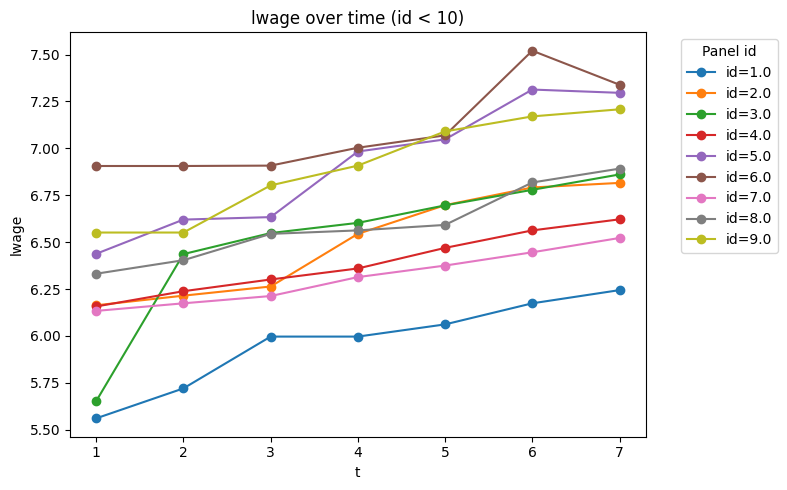

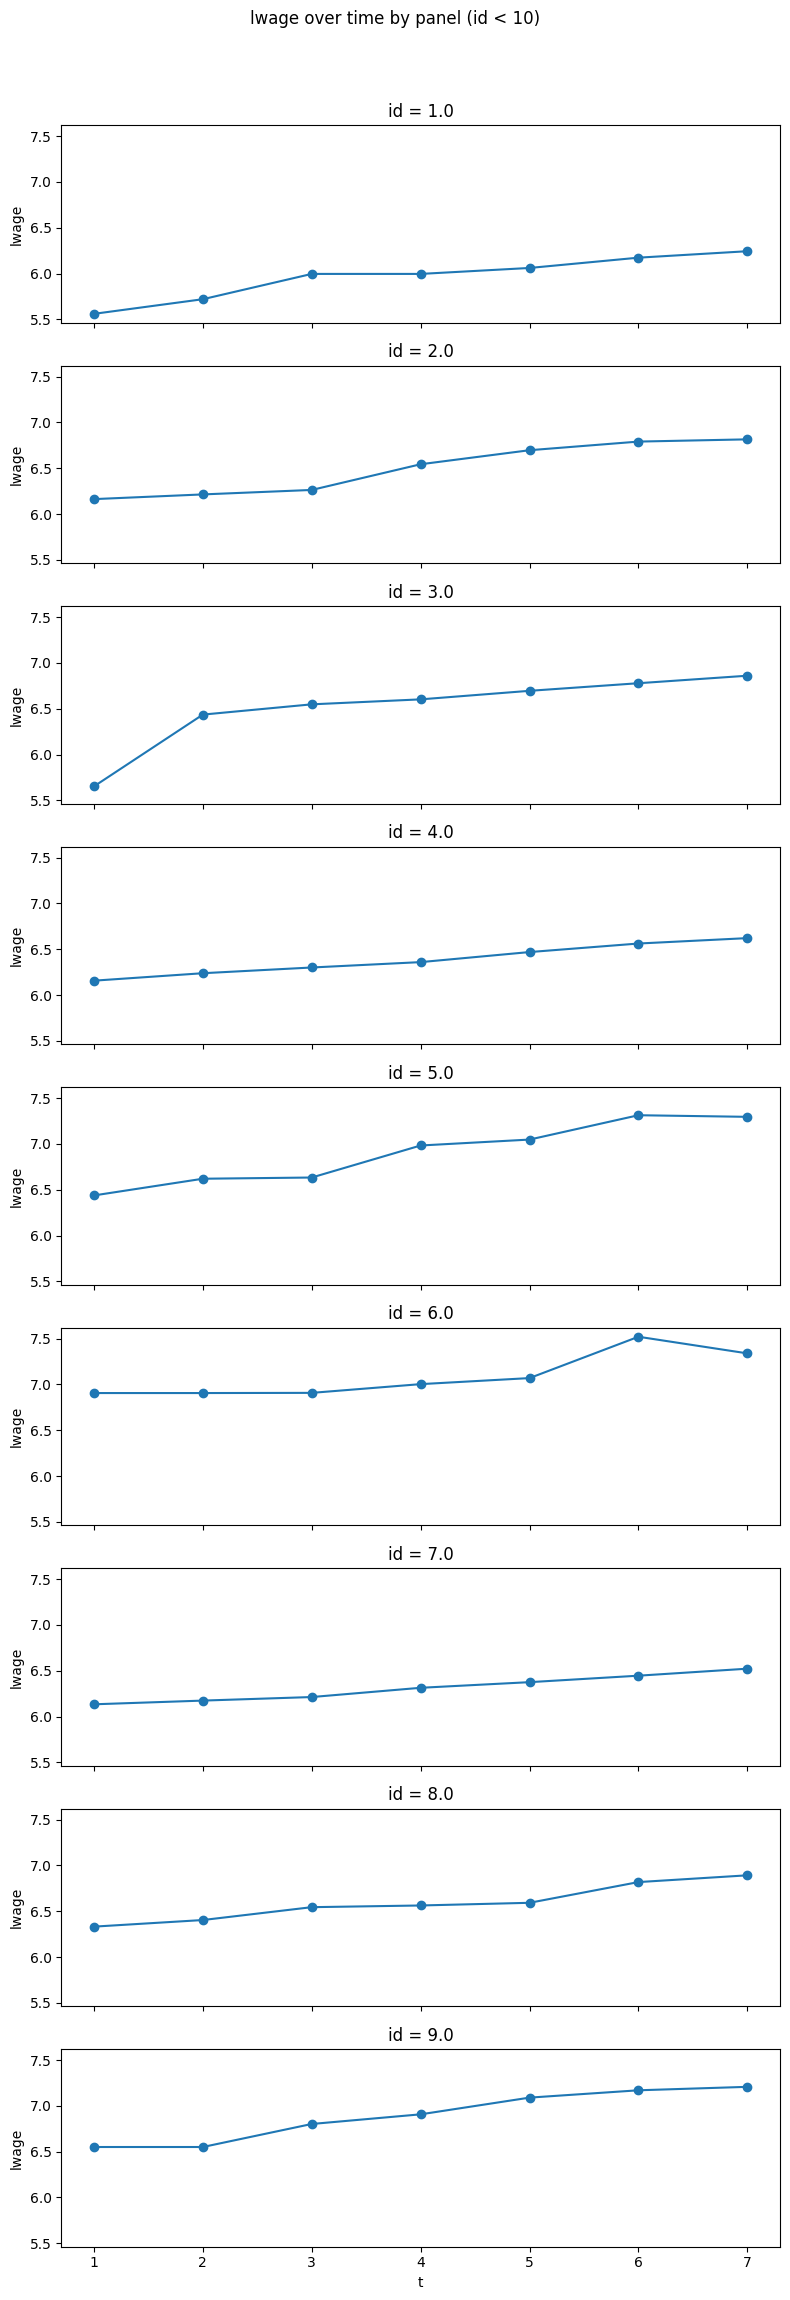

In [25]:
import matplotlib.pyplot as plt

# 1. Asume que tu DataFrame df tiene columnas 'id', 't' y 'lwage'
#    y ya está cargado. Filtramos id < 10:
df_sub = df[df['id'] < 10]

# 2. Opción A: todas las series en el mismo gráfico
plt.figure(figsize=(8, 5))
for pid, grp in df_sub.groupby('id'):
    plt.plot(grp['t'], grp['lwage'], marker='o', label=f'id={pid}')
plt.xlabel('t')
plt.ylabel('lwage')
plt.title('lwage over time (id < 10)')
plt.legend(title='Panel id', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Opción B: un panel por subplot, como facetas
unique_ids = sorted(df_sub['id'].unique())
n = len(unique_ids)
fig, axes = plt.subplots(nrows=n, ncols=1, sharex=True, sharey=True,
                         figsize=(8, 2.5 * n))
for ax, pid in zip(axes, unique_ids):
    grp = df_sub[df_sub['id'] == pid]
    ax.plot(grp['t'], grp['lwage'], marker='o')
    ax.set_ylabel('lwage')
    ax.set_title(f'id = {pid}')
axes[-1].set_xlabel('t')
fig.suptitle('lwage over time by panel (id < 10)', y=1.02)
plt.tight_layout()
plt.show()

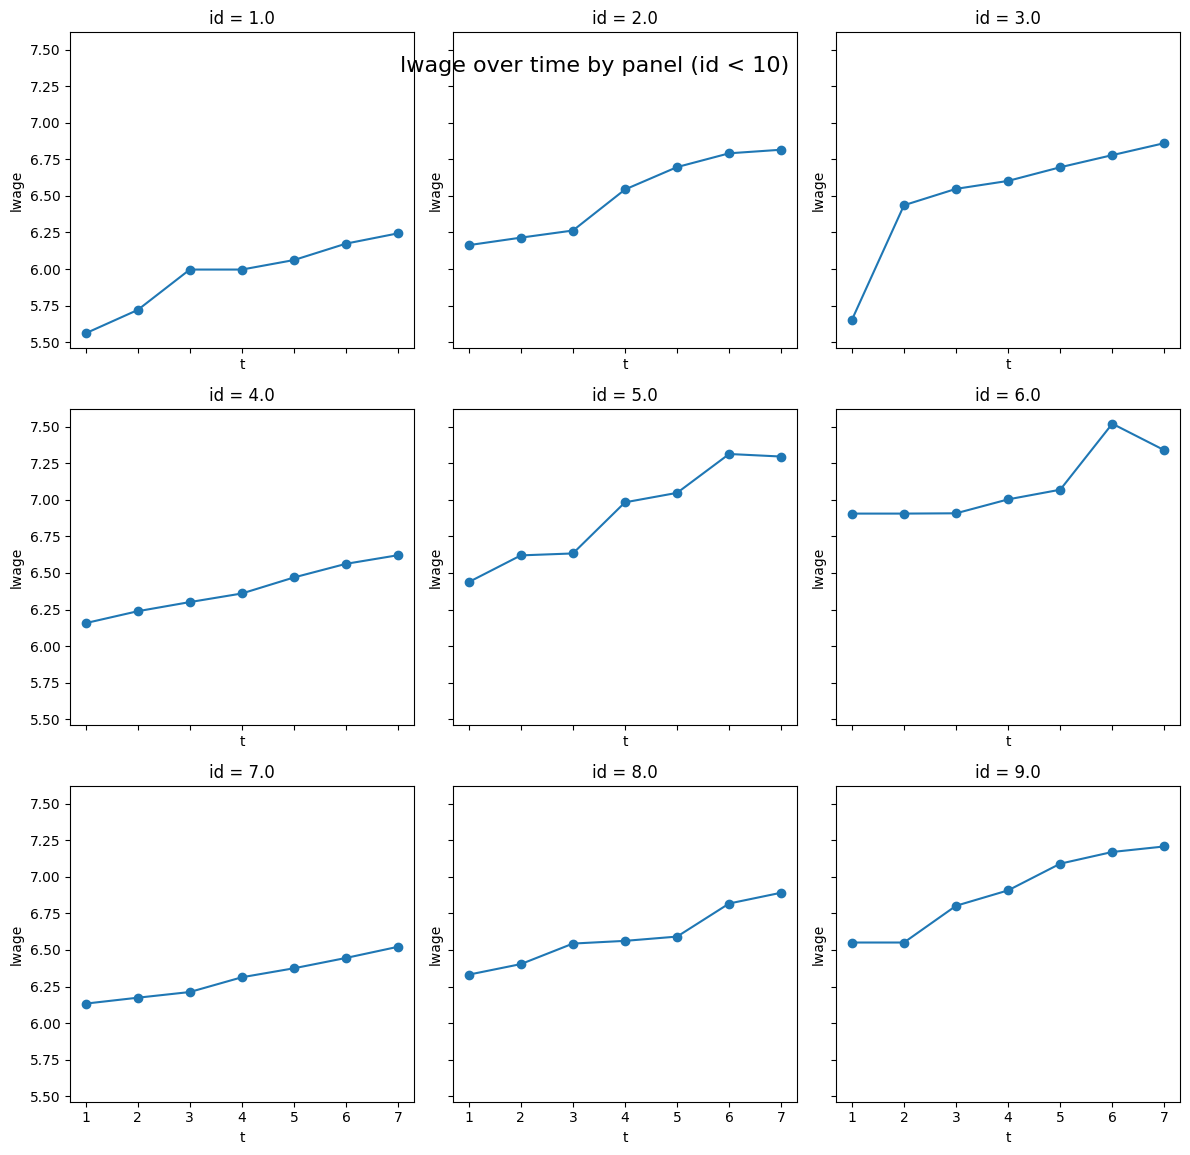

In [28]:
# Filtramos id < 10 y aseguramos orden
df_sub = df[df['id'] < 10].sort_values(['id', 't'])
unique_ids = sorted(df_sub['id'].unique())  # debería ser [1,2,…,9]

# Parámetros de la cuadrícula
nrows, ncols = 3, 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         sharex=True, sharey=True,
                         figsize=(12, 12))

# Aplana la matriz de ejes para iterar fácilmente
axes_flat = axes.flatten()

for ax, pid in zip(axes_flat, unique_ids):
    grp = df_sub[df_sub['id'] == pid]
    ax.plot(grp['t'], grp['lwage'], marker='o')
    ax.set_title(f'id = {pid}')
    ax.set_xlabel('t')
    ax.set_ylabel('lwage')

# Oculta cualquier eje sobrante (por si hay menos de 9 ids)
for ax in axes_flat[len(unique_ids):]:
    ax.set_visible(False)

fig.suptitle('lwage over time by panel (id < 10)', y=0.92, fontsize=16)
plt.tight_layout()
plt.show()


In [29]:
import pandas as pd
pd.set_option('display.max_columns', None)
import pyreadstat as st
import numpy as np
import matplotlib.pyplot as plt


path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\DiTella\MEC\Materias\2025\2025 1T\[MT09] Econometría de Datos de Panel\Clases prácticas\PS 0-20250420\ps0_data\pigweights.dta"

df, meta = st.read_dta(path)
df.head()

,id,weight1,weight2,weight3,weight4,weight5,weight6,weight7,weight8,weight9
0,1.0,24.0,32.0,39.0,42.5,48.0,54.5,61.0,65.0,72.0
1,2.0,22.5,30.5,40.5,45.0,51.0,58.5,64.0,72.0,78.0
2,3.0,22.5,28.0,36.5,41.0,47.5,55.0,61.0,68.0,76.0
3,4.0,24.0,31.5,39.5,44.5,51.0,56.0,59.5,64.0,67.0
4,5.0,24.5,31.5,37.0,42.5,48.0,54.0,58.0,63.0,65.5


In [30]:
# reshape long: stubnames='weight', índice='id', nueva columna j='t'
df_long = pd.wide_to_long(df,
                          stubnames='weight',
                          i='id',
                          j='t',
                          sep='',      # separador entre stubname y número
                          suffix=r'\d+')  # regex para el sufijo (toma dígitos)

# wide_to_long deja 'weight' como columna y 't' como índice, así que rearmamos:
df_long = df_long.reset_index()

print(df_long)

       id  t  weight
0     1.0  1    24.0
1     2.0  1    22.5
2     3.0  1    22.5
3     4.0  1    24.0
4     5.0  1    24.5
..    ... ..     ...
427  44.0  9    76.0
428  45.0  9    80.5
429  46.0  9    80.0
430  47.0  9    88.0
431  48.0  9    85.5

[432 rows x 3 columns]


In [25]:
for i in range(len(s) - 1):
    print(s[i:i+m])

[2, 2]
[2, 1]
[1, 3]
[3, 2]
